#**Downloading stock price data and creating the return and risk models**

Imports:

In [2]:
from pandas_datareader import data as pdr # For stocks data
import datetime as dt # For using sates type
import pandas as pd # For data manipulation
import yfinance as yf # For stocks data
import matplotlib.pyplot as plt # For viz
import seaborn as sns # For viz
import random # To generate random numbers
import math # For calculations
import numpy as np # For matrix calculations


# Using NIXTLA library
from statsforecast import StatsForecast # Used to run the timeseries models
from statsforecast.models import ( # import Garch, Arch, Naive (baseline) models
    GARCH, 
    ARCH, 
    Naive
)

from datasetsforecast.losses import mae, mse, rmse # to validate



/Users/davidwang/opt/anaconda3/lib/python3.8/site-packages/statsforecast/core.py:26: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


Specify a start and end date for analysis and stocks that will be included in the analysis

In [3]:



tickers = [
    "AAPL", "MSFT", "AMZN", "NVDA", "GOOGL", "GOOG", "META", "TSLA", "UNH",
    "LLY", "JPM", "XOM", "JNJ", "V", "PG", "AVGO", "MA", "HD", "CVX",
    "MRK", "ABBV", "PEP", "COST", "ADBE", "KO", "CSCO", "WMT", "TMO", "MCD",
    "PFE", "CRM", "BAC", "ACN", "CMCSA", "LIN", "NFLX", "ABT", "ORCL", "DHR",
    "AMD", "WFC", "DIS", "TXN", "PM", "VZ", "INTU", "COP", "CAT", "AMGN",
    "NEE", "INTC", "UNP", "LOW", "IBM", "BMY", "SPGI", "RTX", "HON", "BA",
    "UPS", "GE", "QCOM", "AMAT", "NKE", "PLD", "NOW", "BKNG", "SBUX", "MS",
    "ELV", "MDT", "GS", "DE", "ADP", "LMT", "TJX", "T", "BLK", "ISRG",
    "MDLZ", "GILD", "MMC", "AXP", "SYK", "REGN", "VRTX", "ETN", "LRCX", "ADI",
    "SCHW", "CVS", "ZTS", "CI", "CB", "AMT", "SLB", "C", "BDX", "MO",
    "PGR", "TMUS", "FI", "SO", "EOG", "BSX", "CME", "EQIX", "MU", "DUK",
    "PANW", "PYPL", "AON", "SNPS", "ITW", "KLAC", "LULU", "ICE", "APD", "SHW",
    "CDNS", "CSX", "NOC", "CL", "MPC", "HUM", "FDX", "WM", "MCK", "TGT",
    "ORLY", "HCA", "FCX", "EMR", "PXD", "MMM", "MCO", "ROP", "CMG", "PSX",
    "MAR", "PH", "APH", "GD", "USB", "NXPI", "AJG", "NSC", "PNC", "VLO",
    "F", "MSI", "GM", "TT", "EW", "CARR", "AZO", "ADSK", "TDG", "ANET",
      "OXY", "PCAR", "ADM", "MNST", "KMB", "PSA", "CCI", "CHTR",
    "MCHP", "MSCI", "CTAS", "WMB", "AIG", "STZ", "HES", "NUE", "ROST", "AFL",
    "KVUE", "AEP", "IDXX", "D", "TEL", "JCI", "MET", "GIS", "IQV", "EXC",
    "WELL", "DXCM", "HLT", "ON", "COF", "PAYX", "TFC", "BIIB", "O", "FTNT",
    "DOW", "TRV", "DLR", "MRNA", "CPRT", "ODFL", "DHI", "YUM", "SPG", "CTSH",
    "AME", "BKR", "SYY", "A", "CTVA",    "AAPL", "MSFT", "AMZN", "NVDA", "GOOGL", "GOOG", "META", "TSLA", "UNH",
    "LLY", "JPM", "XOM", "JNJ", "V", "PG", "AVGO", "MA", "HD", "CVX",
    "MRK", "ABBV", "PEP", "COST", "ADBE", "KO", "CSCO", "WMT", "TMO", "MCD",
    "PFE", "CRM", "BAC", "ACN", "CMCSA", "LIN", "NFLX", "ABT", "ORCL", "DHR",
    "AMD", "WFC", "DIS", "TXN", "PM", "VZ", "INTU", "COP", "CAT", "AMGN",
    "NEE", "INTC", "UNP", "LOW", "IBM", "BMY", "SPGI", "RTX", "HON", "BA",
    "UPS", "GE", "QCOM", "AMAT", "NKE", "PLD", "NOW", "BKNG", "SBUX", "MS",
    "ELV", "MDT", "GS", "DE", "ADP", "LMT", "TJX", "T", "BLK", "ISRG",
    "MDLZ", "GILD", "MMC", "AXP", "SYK", "REGN", "VRTX", "ETN", "LRCX", "ADI",
    "SCHW", "CVS", "ZTS", "CI", "CB", "AMT", "SLB", "C", "BDX", "MO",
    "PGR", "TMUS", "FI", "SO", "EOG", "BSX", "CME", "EQIX", "MU", "DUK",
    "PANW", "PYPL", "AON", "SNPS", "ITW", "KLAC", "LULU", "ICE", "APD", "SHW",
    "CDNS", "CSX", "NOC", "CL", "MPC", "HUM", "FDX", "WM", "MCK", "TGT",
    "ORLY", "HCA", "FCX", "EMR", "PXD", "MMM", "MCO", "ROP", "CMG", "PSX",
    "MAR", "PH", "APH", "GD", "USB", "NXPI", "AJG", "NSC", "PNC", "VLO",
    "F", "MSI", "GM", "TT", "EW", "CARR", "AZO", "ADSK", "TDG", "ANET",
     "OXY", "PCAR", "ADM", "MNST", "KMB", "PSA", "CCI", "CHTR",
    "MCHP", "MSCI", "CTAS", "WMB", "AIG", "STZ", "HES", "NUE", "ROST", "AFL",
    "KVUE", "AEP", "IDXX", "D", "TEL", "JCI", "MET", "GIS", "IQV", "EXC",
    "WELL", "DXCM", "HLT", "ON", "COF", "PAYX", "TFC", "BIIB", "O", "FTNT",
    "DOW", "TRV", "DLR", "MRNA", "CPRT", "ODFL", "DHI", "YUM", "SPG", "CTSH",
    "AME", "BKR", "SYY", "A", "CTVA",
    "BBY", "CF", "CAG", "EPAM", "AMCR", "LW", "PAYC", "SNA", "AXON", "POOL",
    "SYF", "SWK", "ZBRA", "DPZ", "PKG", "CFG", "LDOS", "VTRS", "PODD", "LKQ",
    "MOS", "APA", "EVRG", "TRMB", "MGM", "NDSN", "WDC", "MAS", "LNT", "IPG",
    "MTCH", "STX", "KMX", "TECH", "WRB", "LYV", "IP", "UDR", "AES",
    "CE", "INCY", "L", "TAP", "GEN", "CPT", "KIM", "JKHY", "HRL", "HST",
    "FMC", "CZR", "PEAK", "CDAY", "PNR", "NI", "CHRW", "HSIC", "CRL", "REG",
    "QRVO", "TFX", "KEY", "GL", "EMN", "WYNN", "ALLE", "AAL", "FFIV", "BWA",
    "BXP", "MKTX", "ROL", "JNPR", "PNW", "ETSY", "BLDR", "FOXA", "AOS", "HAS",
    "HII", "NRG", "CPB", "UHS", "BIO", "WRK", "RHI", "CTLT", "XRAY", "BBWI",
    "NWSA", "TPR", "PARA", "SMCI", "BEN", "AIZ", "NCLH", "GNRC", "FRT", "IVZ",
    "VFC", "CMA", "DVA", "JBL", "HUBB", "DECK", "UBER", "MHK", "RL"
    ]

Get the daily price data on all stocks

In [4]:
startx = dt.datetime(random.randint(2000,2017),1,1)
endx = startx + dt.timedelta(days=1825) # Five years

df = yf.download(tickers, start = startx, end = endx, interval='1d') # daily data



[*********************100%%**********************]  320 of 320 completed

3 Failed downloads:
['CDAY']: Exception('%ticker%: No data found, symbol may be delisted')
['KVUE', 'CARR']: Exception("%ticker%: Data doesn't exist for startDate = 1420088400, endDate = 1577768400")


Clean the data have the appropiate format for our models

In [5]:
df = df.loc[:, (['Adj Close'], tickers)]
df.columns = df.columns.droplevel() # drop MultiIndex
df = df.reset_index()

In [6]:
prices = df.melt(id_vars = 'Date')
prices = prices.rename(columns = {'Date':'ds', 'Ticker':'unique_id', 'value':'y'})
prices = prices[['unique_id', 'ds','y']]
prices

,unique_id,ds,y
0,AAPL,2015-01-02,24.435276
1,AAPL,2015-01-05,23.746889
2,AAPL,2015-01-06,23.749121
3,AAPL,2015-01-07,24.082138
4,AAPL,2015-01-08,25.007427
...,...,...,...
402235,RL,2019-12-23,107.450981
402236,RL,2019-12-24,107.952705
402237,RL,2019-12-26,108.639038
402238,RL,2019-12-27,107.730667


Compute Returns

In [7]:
# returns = log(price_t/price_{t-1}) where t = day
prices['rt'] = prices['y'].div(prices.groupby('unique_id')['y'].shift(1)) # price_t/price_{t-1}
prices['rt'] = np.log(prices['rt']) 

returns = prices[['unique_id', 'ds', 'rt']]
returns = returns.rename(columns={'rt':'y'})
returns

,unique_id,ds,y
0,AAPL,2015-01-02,NaN
1,AAPL,2015-01-05,-0.028576
2,AAPL,2015-01-06,0.000094
3,AAPL,2015-01-07,0.013925
4,AAPL,2015-01-08,0.037702
...,...,...,...
402235,RL,2019-12-23,-0.005419
402236,RL,2019-12-24,0.004658
402237,RL,2019-12-26,0.006338
402238,RL,2019-12-27,-0.008397


Train Garch and Arch models

In [ ]:
# Testing out different models of arch, garch, and naive baseline
# varying p (order of arch/autoregerssive terms) and q (order of garch/moving average terms)
# difference between arch and garch is the incorporation of moving average terms (q) along with autoregressive terms (p)

models = [ARCH(1), 
          ARCH(2), 
          GARCH(1,1),
          GARCH(1,2),
          GARCH(2,2),
          GARCH(2,1),
        # Naive model is simple forecasting where forecasts just take the value of the last observations (forecast of future time point = last observed value)
        # Does not account for trends, seasonality, or other patterns, bare minimum baseline
          Naive() 
]

sf = StatsForecast( # set the statsforecast model to cross validate
    df = returns, 
    models = models, 
    freq = 'D', # frequency of forecast set to daily
    n_jobs = -1 # number of jobs for parallel processing set to -1 for all cores
)


# Cross Validation
cv_df = sf.cross_validation(
    df = returns,
    h = 365, # forecast one year into the future or 365 days
  )



In [ ]:
cv_df = cv_df.reset_index()
cv_df.rename(columns = {'y' : 'actual'}, inplace = True)

In [49]:
cv_df

,unique_id,ds,cutoff,actual,ARCH(1),ARCH(2),"GARCH(1,1)","GARCH(1,2)","GARCH(2,2)","GARCH(2,1)",Naive
0,A,2019-12-23,2019-12-20,0.000821,0.168078,0.022324,0.021523,0.161858,0.032717,0.099275,0.008014
1,A,2019-12-24,2019-12-20,0.000469,-0.063893,-0.009702,-0.009195,-0.061555,-0.012322,-0.037524,0.008014
2,A,2019-12-26,2019-12-20,0.001757,-0.054725,-0.007650,-0.007556,-0.052707,-0.010638,-0.032414,0.008014
3,A,2019-12-27,2019-12-20,-0.000351,-0.111133,-0.014575,-0.014723,-0.107034,-0.021611,-0.065632,0.008014
4,A,2019-12-30,2019-12-20,-0.003997,0.089913,0.012443,0.012243,0.086604,0.017431,0.052993,0.008014
5,AAL,2019-12-23,2019-12-20,0.008913,0.071672,0.035963,0.065892,0.066662,0.081324,0.035963,0.017017
6,AAL,2019-12-24,2019-12-20,-0.004104,-0.026993,-0.014398,-0.024816,-0.025106,-0.030628,-0.014398,0.017017
7,AAL,2019-12-26,2019-12-20,0.016653,-0.023305,-0.012231,-0.021425,-0.021676,-0.026443,-0.012231,0.017017
8,AAL,2019-12-27,2019-12-20,-0.042340,-0.047343,-0.023284,-0.043525,-0.044034,-0.053719,-0.023284,0.017017
9,AAL,2019-12-30,2019-12-20,-0.004935,0.038185,0.019245,0.035105,0.035515,0.043327,0.019245,0.017017


Validate

In [47]:
def compute_mae(df):
    """Compute MAE for all models generated"""
    res = {}
    for mod in models: 
        res[mod] = mae(df['actual'], df[str(mod)])
    return pd.Series(res)

mae_df = cv_df.groupby(['unique_id', 'cutoff']).apply(compute_cv_mae).groupby('unique_id').mean()

def compute_mse(df):
    """Compute MAE for all models generated"""
    res = {}
    for mod in models: 
        res[mod] = mse(df['actual'], df[str(mod)])
    return pd.Series(res)

def compute_rmse(df):
    """Compute MAE for all models generated"""
    res = {}
    for mod in models: 
        res[mod] = rmse(df['actual'], df[str(mod)])
    return pd.Series(res)

mae_df = cv_df.groupby(['unique_id', 'cutoff']).apply(compute_mae).groupby('unique_id').mean().dropna()
mse_df = cv_df.groupby(['unique_id', 'cutoff']).apply(compute_mse).groupby('unique_id').mean().dropna()
rmse_df = cv_df.groupby(['unique_id', 'cutoff']).apply(compute_rmse).groupby('unique_id').mean().dropna()




/Users/davidwang/opt/anaconda3/lib/python3.8/site-packages/datasetsforecast/losses.py:71: RuntimeWarning: Mean of empty slice
  mae = np.nanmean(delta_y, axis=axis)
/Users/davidwang/opt/anaconda3/lib/python3.8/site-packages/datasetsforecast/losses.py:71: RuntimeWarning: Mean of empty slice
  mae = np.nanmean(delta_y, axis=axis)
/Users/davidwang/opt/anaconda3/lib/python3.8/site-packages/datasetsforecast/losses.py:118: RuntimeWarning: Mean of empty slice
  mse = np.nanmean(delta_y, axis=axis)
/Users/davidwang/opt/anaconda3/lib/python3.8/site-packages/datasetsforecast/losses.py:118: RuntimeWarning: Mean of empty slice
  mse = np.nanmean(delta_y, axis=axis)


In [48]:
display(mae_df)
display(mse_df)
display(rmse_df)

,ARCH(1),ARCH(2),"GARCH(1,1)","GARCH(1,2)","GARCH(2,2)","GARCH(2,1)",Naive
unique_id,,,,,,,
A,0.051039,0.072233,0.053115,0.060942,0.052263,0.060578,0.034421
AAPL,0.047579,0.051509,0.065512,0.050700,0.049980,0.053120,0.021090
ABT,0.035812,0.035698,0.047479,0.044539,0.052737,0.040137,0.021898
ACN,0.255789,0.271206,0.271281,0.289809,0.312119,0.289598,0.043691
ADBE,0.046379,0.051425,0.054416,0.070752,0.062880,0.052218,0.032688
...,...,...,...,...,...,...,...
WYNN,0.257809,0.274104,0.273576,0.292450,0.316056,0.292980,0.023857
XOM,0.028953,0.036313,0.041180,0.033942,0.046850,0.070493,0.019934
XRAY,0.029168,0.043845,0.039560,0.039646,0.047732,0.039576,0.017390


,ARCH(1),ARCH(2),"GARCH(1,1)","GARCH(1,2)","GARCH(2,2)","GARCH(2,1)",Naive
unique_id,,,,,,,
A,0.004329,0.010356,0.004792,0.006289,0.004497,0.006109,0.002048
AAPL,0.004820,0.005290,0.008865,0.005156,0.005207,0.004810,0.000775
ABT,0.002311,0.002263,0.003822,0.003239,0.004915,0.003193,0.000810
ACN,0.105910,0.120785,0.119234,0.136145,0.160593,0.138086,0.002639
ADBE,0.003473,0.004403,0.004875,0.011896,0.008325,0.004492,0.001800
...,...,...,...,...,...,...,...
WYNN,0.107481,0.123398,0.121160,0.138554,0.164789,0.141404,0.000948
XOM,0.001400,0.002703,0.003053,0.001984,0.004126,0.014326,0.000653
XRAY,0.001442,0.003234,0.002642,0.003240,0.004195,0.002702,0.000482


,ARCH(1),ARCH(2),"GARCH(1,1)","GARCH(1,2)","GARCH(2,2)","GARCH(2,1)",Naive
unique_id,,,,,,,
A,0.064841,0.091776,0.067712,0.077444,0.066346,0.076435,0.042534
AAPL,0.069105,0.072440,0.089888,0.071568,0.071903,0.068917,0.027759
ABT,0.045106,0.044988,0.059766,0.055949,0.066331,0.050614,0.026242
ACN,0.325437,0.347539,0.345301,0.368976,0.400739,0.371598,0.049526
ADBE,0.058885,0.065379,0.068872,0.089585,0.079804,0.066129,0.040270
...,...,...,...,...,...,...,...
WYNN,0.327797,0.351207,0.348029,0.372170,0.405842,0.375951,0.030091
XOM,0.036583,0.046018,0.051916,0.042779,0.059139,0.088985,0.023071
XRAY,0.036691,0.055108,0.049746,0.049880,0.060206,0.049615,0.021546


Plotting

,ds,cutoff,actual,ARCH(1),ARCH(2),"GARCH(1,1)","GARCH(1,2)","GARCH(2,2)","GARCH(2,1)",Naive
unique_id,,,,,,,,,,
A,2003-07-22 12:44:34.849315072,2002-10-30 04:48:00,0.000856,0.002936,0.004359,0.002689,0.003372,0.003015,0.003688,-0.021402
AAPL,2003-07-22 12:44:34.849315072,2002-10-30 04:48:00,0.001405,0.000492,0.001284,0.002287,0.001150,0.000793,0.002850,-0.009767
ABT,2003-07-22 12:44:34.849315072,2002-10-30 04:48:00,0.000245,0.002255,0.002222,0.003119,0.002929,0.003453,0.002540,-0.011716
ACN,2003-07-22 12:44:34.849315072,2002-10-30 04:48:00,0.000709,0.015963,0.015550,0.016789,0.017857,0.017571,0.016365,-0.023257
ADBE,2003-07-22 12:44:34.849315072,2002-10-30 04:48:00,0.001188,0.002504,0.002876,0.003020,0.003994,0.003652,0.002890,-0.022411
...,...,...,...,...,...,...,...,...,...,...
WYNN,2003-07-22 12:44:34.849315072,2002-10-30 04:48:00,0.002739,0.015962,0.015549,0.016788,0.017856,0.017570,0.016364,-0.016076
XOM,2003-07-22 12:44:34.849315072,2002-10-30 04:48:00,0.000506,0.001779,0.002222,0.002658,0.002228,0.003083,0.004486,-0.006209
XRAY,2003-07-22 12:44:34.849315072,2002-10-30 04:48:00,0.000744,0.001779,0.002893,0.002496,0.002497,0.003090,0.002584,-0.003854


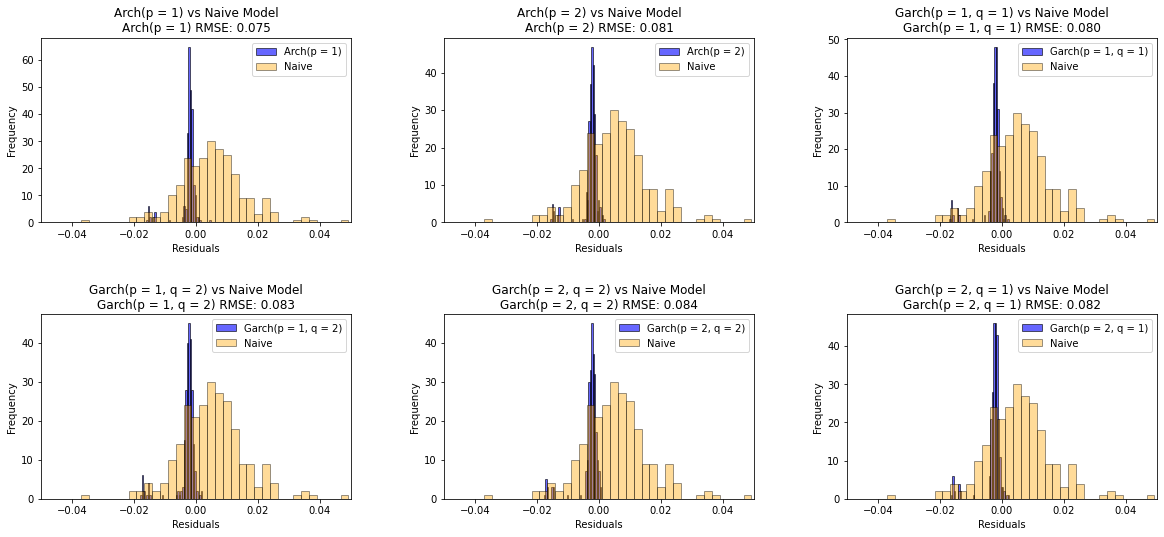

In [111]:
residuals_df = cv_df.groupby('unique_id').mean().dropna()

# RMSEs
rmses = {}
for i, col in enumerate(rmse_df.columns): # 0 = arch1, 1 = arch2, 2 = garch11, 3 = garch12, 4 = garch22, 5 = garch21, 6 = naive
    rmses[i] = rmse_df[col].mean(skipna = True)

# Plotting the histograms with legends and RMSE in titles
baseline_residuals = residuals_df['actual'] - residuals_df['Naive']
arch_one_residuals = residuals_df['actual'] - residuals_df['ARCH(1)']
arch_two_residuals = residuals_df['actual'] - residuals_df['ARCH(2)']
garch_oneone_residuals = residuals_df['actual'] - residuals_df['GARCH(1,1)']
garch_onetwo_residuals = residuals_df['actual'] - residuals_df['GARCH(1,2)']
garch_twotwo_residuals = residuals_df['actual'] - residuals_df['GARCH(2,2)']
garch_twoone_residuals = residuals_df['actual'] - residuals_df['GARCH(2,1)']



plt.figure(figsize=(20, 8))
plt.subplots_adjust(left = 0.125, right = 0.9, bottom = 0.1, top = 0.9, wspace = 0.3, hspace = 0.5)

plt.subplot(2, 3, 1)
plt.hist(arch_one_residuals, bins=40, edgecolor='black', color='blue', label='Arch(p = 1)', alpha=0.6)
plt.hist(baseline_residuals, bins=40, edgecolor='black', color='orange', label='Naive', alpha=0.4)
plt.title(f'Arch(p = 1) vs Naive Model\nArch(p = 1) RMSE: {rmses[0]:.3f}')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.xlim(-0.05, 0.05)
plt.legend()

plt.subplot(2, 3, 2)
plt.hist(arch_two_residuals, bins=40, edgecolor='black', color='blue', label='Arch(p = 2)', alpha=0.6)
plt.hist(baseline_residuals, bins=40, edgecolor='black', color='orange', label='Naive', alpha=0.4)
plt.title(f'Arch(p = 2) vs Naive Model\nArch(p = 2) RMSE: {rmses[1]:.3f}')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.xlim(-0.05, 0.05)
plt.legend()

plt.subplot(2, 3, 3)
plt.hist(garch_oneone_residuals, bins=40, edgecolor='black', color='blue', label='Garch(p = 1, q = 1)', alpha=0.6)
plt.hist(baseline_residuals, bins=40, edgecolor='black', color='orange', label='Naive', alpha=0.4)
plt.title(f'Garch(p = 1, q = 1) vs Naive Model\nGarch(p = 1, q = 1) RMSE: {rmses[2]:.3f}')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.xlim(-0.05, 0.05)
plt.legend()

plt.subplot(2, 3, 4)
plt.hist(garch_onetwo_residuals, bins=40, edgecolor='black', color='blue', label='Garch(p = 1, q = 2)', alpha=0.6)
plt.hist(baseline_residuals, bins=40, edgecolor='black', color='orange', label='Naive', alpha=0.4)
plt.title(f'Garch(p = 1, q = 2) vs Naive Model\nGarch(p = 1, q = 2) RMSE: {rmses[3]:.3f}')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.xlim(-0.05, 0.05)
plt.legend()

plt.subplot(2, 3, 5)
plt.hist(garch_twotwo_residuals, bins=40, edgecolor='black', color='blue', label='Garch(p = 2, q = 2)', alpha=0.6)
plt.hist(baseline_residuals, bins=40, edgecolor='black', color='orange', label='Naive', alpha=0.4)
plt.title(f'Garch(p = 2, q = 2) vs Naive Model\nGarch(p = 2, q = 2) RMSE: {rmses[4]:.3f}')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.xlim(-0.05, 0.05)
plt.legend()

plt.subplot(2, 3, 6)
plt.hist(garch_twoone_residuals, bins=40, edgecolor='black', color='blue', label='Garch(p = 2, q = 1)', alpha=0.6)
plt.hist(baseline_residuals, bins=40, edgecolor='black', color='orange', label='Naive', alpha=0.4)
plt.title(f'Garch(p = 2, q = 1) vs Naive Model\nGarch(p = 2, q = 1) RMSE: {rmses[5]:.3f}')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.xlim(-0.05, 0.05)
plt.legend()



Output CSV with Garch(2,2)

In [ ]:


garch_model = [GARCH(2,2)]

garch_sf = StatsForecast( # set the statsforecast model to cross validate
    df = returns, 
    models = garch_model, 
    freq = 'D', # frequency of forecast set to year start
    n_jobs = -1 # number of jobs for parallel processing set to -1 for all cores
)


# Cross Validation
garch_df = sf.cross_validation(
    df = returns,
    h = 365, # grab returns of 365 days of predicted returns
  )

In [179]:
d = {"Date": garch_df['ds'], "Return": garch_df['GARCH(2,2)']}
return_df = pd.DataFrame(data=d).reset_index()
return_df = return_df.rename(columns={"unique_id": "Symbol"})

return_df = return_df.pivot(index = 'Symbol', columns = 'Date', values = 'Return')

return_df.to_csv('sp_500_stocks.csv')